<a href="https://colab.research.google.com/github/SireneNova/Coursework/blob/master/AI/Pytorch7_8_softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tensor([[ 8.1464e-02, -1.8799e+01,  7.8804e+00,  1.2064e+01,  2.4766e+00,
          1.4660e+01, -1.1740e+01,  1.0742e+01, -1.3177e+00, -9.8550e+00],
        [ 4.9590e-01, -1.1005e+01,  1.0888e+01,  7.9751e+00, -9.7716e-01,
          1.2389e+01, -2.0917e+01, -6.0662e+00, -4.0756e+00, -9.8379e+00],
        [-8.8285e+00, -3.0598e+01,  1.9232e+00,  9.2204e+00,  1.3400e+01,
          9.9415e+00, -3.5003e+00,  3.4389e+00,  5.4994e+00,  5.4767e-01],
        [-4.2322e+00, -1.3419e+01,  1.0840e+01,  5.4063e-01,  7.8042e+00,
          1.2541e+01,  8.1697e-01,  1.5883e+00,  2.8615e+00, -1.2615e+01],
        [ 7.3071e+00, -9.0362e+00,  3.9892e+00,  1.7818e+01,  3.7456e+00,
          1.3195e+01,  1.8045e-01,  2.2988e+00,  3.6370e+00, -8.8946e+00],
        [ 3.7623e+00, -1.7558e+01, -1.0053e+00,  1.6608e+01,  1.3665e+00,
          1.1847e+01, -9.5120e+00,  4.0476e+00,  6.1468e+00, -4.9018e-01],
        [-1.0369e+01, -1.8798e+01,  1.9203e-02,  1.7529e+01,  6.6244e+00,
          1.0344e+01, -1.3035e+0

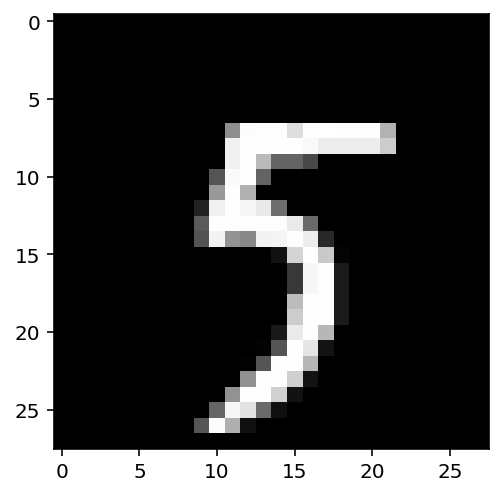

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import torch
import helper
import matplotlib.pyplot as plt
from torchvision import datasets, transforms

# sigmoid activation function (probability)
def activation(x):
  return 1/(1+torch.exp(-x))
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), 
                                transforms.Normalize((.5,), (.5,)),
                                ])

# Download and load the training data
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform) # https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627 # other method stopped working
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
dataiter = iter(trainloader)
images, labels = dataiter.next()
#print(type(images))
#print(images.shape)
#print(labels.shape)

#show a number:    
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');
#flatten the input images (keep the batches the same, but change the dimensions to 1d)
inputs = images.view(images.shape[0], -1) #could put 784, but -1 is shortcut (64 rows, 784 columns?)
#create parameters
w1 = torch.randn(784, 256)
b1 = torch.randn(256)
w2 = torch.randn(256, 10)
b2 = torch.randn(10)
h= activation(torch.mm(inputs, w1) +b1)
out = torch.mm(h, w2) + b2

print(out)
print(out.shape)

def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x), dim=1).view(-1, 1) #sum with dim=1 means sum across the columns #view changes our output from 64x64 to 64x10 with the same value

#dim=1 means dimension = 1, takes sum accross the columns

probabilities = softmax(out)

# does it have the right shape? should be (64, 10)
print(probabilities.shape)

# does it sum to 1?
print(probabilities.sum(dim=1))